# Open, check and visualize data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

In [3]:
path = "churn_rate_prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv"
data = pd.read_csv(path)
data.drop('customerID', axis=1, inplace=True)
data['SeniorCitizen'] = data['SeniorCitizen'].map({0: 'No', 1: 'Yes'})
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   object 
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


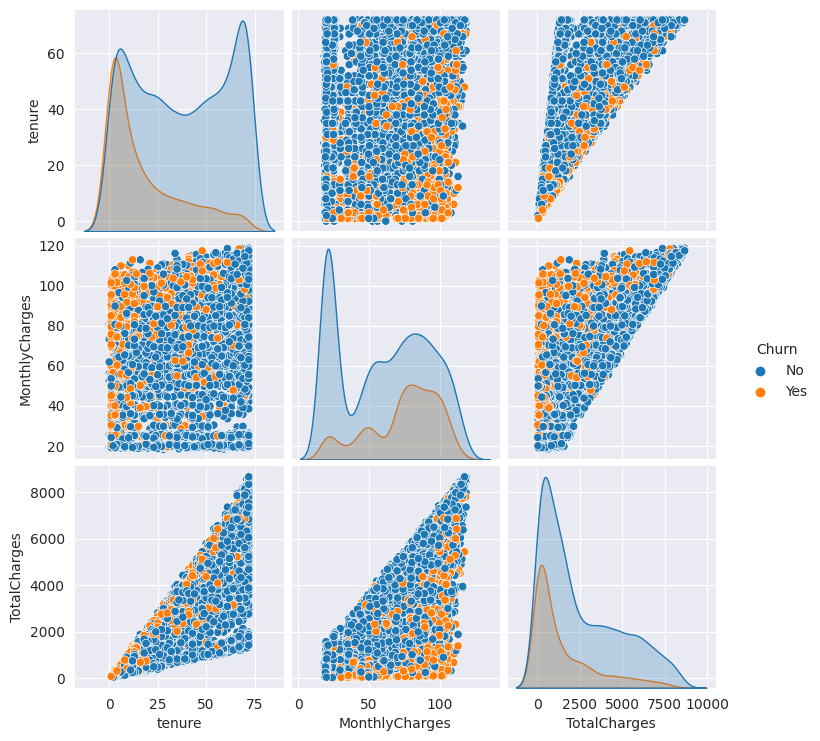

In [6]:
sns.pairplot(data[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']], hue='Churn');

In [7]:
X = data.drop('Churn', axis=1)
y = data['Churn']

# Preprocess functions

In [8]:
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

In [9]:
numeric_transformer = make_pipeline(
    SimpleImputer(strategy='mean'),
    MinMaxScaler()
)
categorical_transformer = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OneHotEncoder(handle_unknown='ignore')
)

numeric_columns = make_column_selector(dtype_include=np.number)
categorical_columns = make_column_selector(dtype_include='O')

preprocessing = make_column_transformer(
    (numeric_transformer, numeric_columns),
    (categorical_transformer, categorical_columns)
)

# Model

In [33]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()

# Pipeline

In [34]:
from sklearn.pipeline import Pipeline

pipe = Pipeline(steps=[
    ('preprocessing', preprocessing),
    ('classifier', model)
])

# Cross validation score

In [35]:
from sklearn.model_selection import cross_val_score

In [36]:
cross_val_score(pipe, X, y, cv=5, scoring='f1_macro', verbose=2, n_jobs=4)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


[CV] END .................................................... total time=   1.3s
[CV] END .................................................... total time=   1.3s
[CV] END .................................................... total time=   1.6s
[CV] END .................................................... total time=   1.7s
[CV] END .................................................... total time=   1.3s


[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    2.6s finished


array([0.74434081, 0.74420682, 0.70848063, 0.74577865, 0.72830861])

# Grid Search with Pipeline

In [37]:
from sklearn.model_selection import GridSearchCV

In [43]:
params = {
    'classifier__learning_rate': [0.5, 0.1, 0.01],
    'classifier__n_estimators': [50, 100, 200, 500]
}
grid_pipe = GridSearchCV(pipe,
                         param_grid=params,
                         cv=5,
                         scoring='f1_macro',
                         verbose=2)

grid_pipe.fit(X, y)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END classifier__learning_rate=0.5, classifier__n_estimators=50; total time=   0.7s
[CV] END classifier__learning_rate=0.5, classifier__n_estimators=50; total time=   0.7s
[CV] END classifier__learning_rate=0.5, classifier__n_estimators=50; total time=   0.6s
[CV] END classifier__learning_rate=0.5, classifier__n_estimators=50; total time=   0.6s
[CV] END classifier__learning_rate=0.5, classifier__n_estimators=50; total time=   0.6s
[CV] END classifier__learning_rate=0.5, classifier__n_estimators=100; total time=   1.2s
[CV] END classifier__learning_rate=0.5, classifier__n_estimators=100; total time=   1.2s
[CV] END classifier__learning_rate=0.5, classifier__n_estimators=100; total time=   1.2s
[CV] END classifier__learning_rate=0.5, classifier__n_estimators=100; total time=   1.2s
[CV] END classifier__learning_rate=0.5, classifier__n_estimators=100; total time=   1.1s
[CV] END classifier__learning_rate=0.5, classifier__n_

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer()),
                                                                                         ('minmaxscaler',
                                                                                          MinMaxScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7f74133c6310>),
                                                                        ('pipeline-2',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7f74133c6100>)])),
                                       ('classifier',
                                        GradientBoostingClassifier())]),
             param_grid={'classifier__learning_rate': [0.5, 0.1, 0.01],
                         'classifier__n_estimators': [50, 100, 200, 500]},
             scoring='f1_macro', verbose=2)

In [44]:
grid_pipe.best_params_

{'classifier__learning_rate': 0.1, 'classifier__n_estimators': 100}

In [45]:
grid_pipe.best_score_

0.7336910339438183